# A comparison of CAO points between 2019, 2020, and 2021.
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as rq
import re
import datetime as dt
import urllib.request as urlrq
#from scipy.stats import norm
import seaborn as sns

- How to load CAO points information from the CAO website.
- A detailed comparison of CAO points in 2019, 2020, and 2021 using pandas

***

#### Set plot parameters


In [79]:
sns.set()
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,7)

<br>

## Creating time stamps for file names

In [3]:
# Getting the date and time as items in an array.
now = dt.datetime.now()

# Taking the string items and putting them in a string.
strnow = now.strftime('%Y_%m_%d_%H%M')

<br>

## Obtaining the 2021 data from a html webpage..

In [4]:
# Pulling raw data from CAO - level 8 (2021) [1]
CAO_2021 = rq.get("http://www2.cao.ie/points/l8.php")


In [5]:
# Identifying if they pull correctly (Response [200] means its good.)
CAO_2021

<Response [200]>

<br>

#### Backing up original html data

In [6]:
# Creating a path to backup original html data with time/date.
original_data = "data/cao2021_raw_"+strnow+".html"

In [7]:
# Backing up the original html file.

# Need to change the encoder to cp1252. 
CAO_2021.encoding = "cp1252" 

# Writing raw data to the path defined above - "original-data".
with open (original_data, "w") as f:
    f.write(CAO_2021.text)

<br>

#### Creating a regular expression to identify relevant lines

In [8]:
# Regular expression to match any line with a CAO number and wildcard thereafter. 
re_course = re.compile("[A-Z]{2}[0-9]{3}.*")  # Compling the REGEX code in memory. 

<br>

#### Searching for relevant lines and writing to CSV file

In [9]:
# Defining a path to output the 2021 date with time/date. 
path = "data/cao2021_"+strnow+".csv"

In [10]:
counter = 0  

# Opening path to write to. 
with open (path, "w") as f:  

    # Iterating through lines on CAO webpage. 
    for line in CAO_2021.iter_lines(): 
        
        # Decoding each line on html page. 
        decoded = line.decode('cp1252') # error in the standard used. ISO standard didn't reckonise character '\x96' on CM002.
        
        # Calling the Regex 
        if re_course.fullmatch(decoded):  
            
            # Slicing the line into groups
            code = decoded[:5]
            title = decoded[7:57]
            p_1 = decoded[60:65]
            p_2 = decoded[65:]
            
            # Joining each group with comma and writing each line to the path
            f.write(code + "," + title + "," + p_1 + "," + p_2 +"\n") 
            
            counter +=1
            
print ("\nNumber of level 8 courses in 2021: {}\n".format(counter))


Number of level 8 courses in 2021: 949



#### Calling the CSV file into a Pandas dataframe

In [11]:
# Reading in data to dataframe. 
df2021 = pd.read_csv(path)

# setting columns when I read in csv caused issues when concat the dataframes. 
df2021.columns = ["Course Code", "Course Name", "2021 Round 1", "2021 Round 2"]

In [12]:
df2021

,Course Code,Course Name,2021 Round 1,2021 Round 2
0,AL802,Software Design in Artificial Intelligence for...,313,
1,AL803,Software Design for Mobile Apps and Connected ...,350,
2,AL805,Computer Engineering for Network Infrastructur...,321,
3,AL810,Quantity Surveying ...,328,
4,AL811,Civil Engineering ...,,
...,...,...,...,...
943,WD211,Creative Computing ...,270,
944,WD212,Recreation and Sport Management ...,262,
945,WD230,Mechanical and Manufacturing Engineering ...,230,230
946,WD231,Early Childhood Care and Education ...,266,


***

<br>

## Obtaining the 2020 data from an Excel file.

The 2020 CAO data is on an excel spreadsheet on the CAO website.  After backing the original data up, I will read it in using Pandas.

#### Backing up original Excel file

In [13]:
# Creating a path from original data backup.
original_data = "data/cao2020_raw_"+strnow+".xlsx"

In [14]:
# saving url of Excel file as a variable.
url = "http://www2.cao.ie/points/CAOPointsCharts2020.xlsx"

# Using urllib function pull the original excel file and back up to the path above.
urlrq.urlretrieve(url, original_data)

('data/cao2020_raw_2021_12_14_2030.xlsx',
 <http.client.HTTPMessage at 0x1bc8dd39760>)

<br>

#### Reading Excel file into a Pandas dataframe.

In [15]:
# Reading in the excel file to a pandas dataframe, skipping first 10 rows.
df = pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", skiprows=10)

# Creating new dataframe with only the relevant columns.
df2020 = df[["COURSE CODE2","COURSE TITLE", "R1 POINTS", "R2 POINTS"]]# Ref: [10]
df2020.columns = ["Course Code", "Course Name", "2020 Round 1", "2020 Round 2"]

<br>

#### Spot checking dataframe

In [16]:
# printing the dataframe and checking the number of rows.  Excel file has 1464. 
df2020

,Course Code,Course Name,2020 Round 1,2020 Round 2
0,AC120,International Business,209,NaN
1,AC137,Liberal Arts,252,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,NaN
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,NaN
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,NaN
...,...,...,...,...
1459,WD208,Manufacturing Engineering,188,NaN
1460,WD210,Software Systems Development,279,NaN
1461,WD211,Creative Computing,271,NaN
1462,WD212,Recreation and Sport Management,270,NaN


In [17]:
# Spot checking random rows
df2020.iloc[[123, 1460]]

,Course Code,Course Name,2020 Round 1,2020 Round 2
123,CK401,Computer Science,468,NaN
1460,WD210,Software Systems Development,279,NaN


1. Item at row 123 on df should be row 135 on original excel file - (CK401). 
2. Item at row 1460 on df should be row 1472 on orignal excel file - (WD210).

- Minus 10 from skipped rows.
- Minus 1 as we don't include column names.
- Minus 1 as df starts at row 0, excel starts at row 1. 

<br>

#### Backing up the relevant CAO 2020 data to a CSV file.

In [18]:
# Defining a path.
path_2019 = "data/cao2020_" + strnow + ".csv"

# Outputing to CSV.
df2020.to_csv(path_2019)

Theres a lot more courses in 2020.  Need to consider whether to include addional courses with no points assigned. 
or consider only analysing the courses with points assigned across 3 years. 
***

<br>

## Obtaining the 2019 data from a PDF file.

#### Steps to prepare the CAO 2019 data.

1. Save the PDF file to the local data folder.
2. Open in Microsoft Word and save original version of the word doc.
3. Save a 'workings' copy.
4. Delete header, footer and preamble.
5. Copy all data and paste into Notepad ++
6. Remove HEI name headings, and blank lines.
7. Find "\t\t" and replace with "\t".
8. Replace backtick "`" with single quote "'"
9. Read in to Jupyter Notebook with sep='t' and only first 4 columns.
10. Fix any errors on the CSV file. 


<br>

#### Reading in 2019 Data.

In [19]:
# Defining the path variable
path_2019 = "data\cao2019_dataset.csv"

# Reading in columns 1-4. [11]
df2019 = pd.read_csv(path_2019, sep='\t', usecols =[0,1,2])

In [20]:
# Creating an empty column so that all dataframes have same column headings
df2019.insert(3, 'new-col', 0)
df2019.columns = ["Course Code", "Course Name", "2019 Round 1", "2019 Round 2"]

In [21]:
df2019

,Course Code,Course Name,2019 Round 1,2019 Round 2
0,AL801,Software Design with Virtual Reality and Gaming,304,0
1,AL802,Software Design with Cloud Computing,301,0
2,AL803,Software Design with Mobile Apps and Connected...,309,0
3,AL805,Network Management and Cloud Infrastructure,329,0
4,AL810,Quantity Surveying,307,0
...,...,...,...,...
925,WD200,Arts (options),221,0
926,WD210,Software Systems Development,271,0
927,WD211,Creative Computing,275,0
928,WD212,Recreation and Sport Management,274,0


***

## Joining Dataframes

## Adding course codes and names to one dataframe and finding duplicates

In [22]:
# Indexing the course code and course name
courses2021 = df2021[['Course Code', 'Course Name']]
courses2020 = df2020[['Course Code', 'Course Name']]
courses2019 = df2019[['Course Code', 'Course Name']]

In [23]:
# Adding code and course name to 1 dataframe by the concat function.
all_courses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)

In [24]:
# Sorting by course code to see they're duplicated [16]
all_courses.sort_values("Course Code")

,Course Code,Course Name
174,AC120,International Business ...
948,AC120,International Business
2580,AC120,International Business
949,AC137,Liberal Arts
2581,AC137,Liberal Arts
...,...,...
2411,WD230,Mechanical and Manufacturing Engineering
945,WD230,Mechanical and Manufacturing Engineering ...
3341,WD230,Mechanical and Manufacturing Engineering
946,WD231,Early Childhood Care and Education ...


In [25]:
# Removing duplicated courses by course code and names may have discrepancies. [15]
# Amending original dataframe and resetting the index. 
all_courses.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)

## Joining the points from each year as an additional column

In [26]:
# Setting the index to the Course code as this is the basis for the .function used below [14]
all_courses.set_index("Course Code", inplace=True)

In [27]:
# Setting the index for each year to the Course Code
df2021.set_index("Course Code", inplace=True)
df2020.set_index("Course Code", inplace=True)
df2019.set_index("Course Code", inplace=True)

In [28]:
# Theres no inplace parameter for the .join function.  Re-assigning variable. 
all_courses = all_courses.join(df2021[["2021 Round 1", "2021 Round 2"]])
all_courses = all_courses.join(df2020[["2020 Round 1", "2020 Round 2"]])
all_courses = all_courses.join(df2019[["2019 Round 1"]]) # Round 2 not available. 

In [29]:
all_courses

,Course Name,2021 Round 1,2021 Round 2,2020 Round 1,2020 Round 2,2019 Round 1
Course Code,,,,,,
AL802,Software Design in Artificial Intelligence for...,313,,332,NaN,301
AL803,Software Design for Mobile Apps and Connected ...,350,,337,NaN,309
AL805,Computer Engineering for Network Infrastructur...,321,,333,NaN,329
AL810,Quantity Surveying ...,328,,319,NaN,307
AL811,Civil Engineering ...,,,320,NaN,NaN
...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,NaN,NaN,289
TL803,Music Technology,NaN,NaN,NaN,NaN,264


## Tiding up the all_courses dataframe

We have seen extra information in the CAO data as listed below.

- "AQA" means all qualified applicants i.e. no min points. 
- "\*" means not all applicants with these points received an offer.
- "\#" means Test / Interview / Portfolio / Audition also required.
- "matric" or "mat" are matriculation requirements. 

Considering matriculation requirements out of scope for this assessment. The assignment instruction requests "a detailed comparison of CAO points in 2019, 2020, and 2021", I will not review pre-requisites.

<br>

#### Additional Requirements in 2021
Finding courses in 2021 that had Test / Interview / Portfolio / Audition.

MH802 and MH803 were the only courses that had a test at round 2, but not at round one.  No course had a test in round 1 and not in round 2. 

Below I will check if courses in round 1 or round 2 required an additional assessment. I will save results as a Boolean, i.e. True/ False for each in a seperate dataframe.  Using Boolean algerbra I will compare them before adding them to the all_courses dataframe. 

In [30]:
# Searching if 2021 Round 1 contains # charachter. If True, return True, otherwise False.[20]
# Saving the data series as a dataframe.
test21 = (all_courses['2021 Round 1'].str.contains("#")==True).to_frame()

In [31]:
# Creating a column with a similar function as above for round 2. 
test21["2021 Round 2"] = all_courses['2021 Round 2'].str.contains("#")==True

In [32]:
# Creating a third column which Boolean algebra to determine if either round 1 or round 2 had an assessment. [22]
test21['2021 assessment'] = test21['2021 Round 1'] | test21['2021 Round 2']

In [33]:
all_courses = all_courses.join(test21[["2021 assessment"]])

<br>

#### Additional Requirments in 2020 

2020 was different in that the excel file had a column to identify those with an additional assessment.

These were also represented for some in the "2020 Round 1/2 column.  All of which were duplicated in the additional assessments column.

Below I will create a dataframe for 2020 additional asssements and join it to the all_courses dataframe as True/ False similar to 2019 and 2021. 

In [34]:
# reading in the dataframe and setting the column names
test2020 = df[["COURSE CODE2" , "Test/Interview #"]]# Ref: [10]
test2020.columns = ["Course Code", "2020 assessment"]

In [35]:
# Setting the course code as the index
test2020.set_index("Course Code", inplace=True)

In [36]:
# Replacing '#' with the boolean True. [24]
test2020 = test2020.replace("#", True)

In [37]:
# Remaining items ("NaN") to be False [19]
test2020 = test2020["2020 assessment"].fillna(False)

In [38]:
# Above created a Data Series. Converting back to a dataframe [18]
test2020  = test2020.to_frame()

In [39]:
# Joining test2020 to the all_courses dataframe
all_courses = all_courses.join(test2020[["2020 assessment"]])

<br>

#### Additional Requirements in 2019.

This was represented that same as 2020 i.e. within the points column. 

Below I will add a Boolean column to the end i.e. True if additional assesment was required. False if not.

In [40]:
# Proforming the same operation as I did with 2021 for 2019. 
# Similar to 2021 function, if True, return True, otherwise False.[20]
all_courses["2019 assessment"] = all_courses['2019 Round 1'].str.contains("#")==True

<br>

#### Removing unnecessary information

In [41]:
# Removing matriculation requirements [23]
all_courses = all_courses.replace('#\+matric','', regex=True)

In [42]:
all_courses = all_courses.replace('# \+mat', '', regex=True)

In [43]:
# Dropping the # as it has been represented in additional assessment columns.

all_courses = all_courses.replace('#', '', regex=True)

In [44]:
# Removing * 
all_courses = all_courses.replace('\*', '', regex=True)

In [45]:
# Replacing AQA with 0. As there was no minimum points. 
all_courses = all_courses.replace("AQA", 0, regex=True)

<br>

#### Converting points in all_courses to ints

Creating a function rather than repeating the code 5 times. 

.astype(ints) will not allow null values and ints co-exist in same column.  However .astype('Int64') does allow this. [21][25]

In [46]:
# Function to read in the column names and convert values to ints. 

def to_float (i):
    all_courses[i] = np.floor(pd.to_numeric(all_courses[i], errors='coerce')).astype('Int64')

In [47]:
to_float("2021 Round 1")
to_float("2021 Round 2")
to_float("2020 Round 1")
to_float("2020 Round 2")
to_float("2019 Round 1")

In [48]:
all_courses

,Course Name,2021 Round 1,2021 Round 2,2020 Round 1,2020 Round 2,2019 Round 1,2021 assessment,2020 assessment,2019 assessment
Course Code,,,,,,,,,
AL802,Software Design in Artificial Intelligence for...,313,<NA>,332,<NA>,301,False,False,False
AL803,Software Design for Mobile Apps and Connected ...,350,<NA>,337,<NA>,309,False,False,False
AL805,Computer Engineering for Network Infrastructur...,321,<NA>,333,<NA>,329,False,False,False
AL810,Quantity Surveying ...,328,<NA>,319,<NA>,307,False,False,False
AL811,Civil Engineering ...,<NA>,<NA>,320,<NA>,<NA>,False,False,False
...,...,...,...,...,...,...,...,...,...
SG441,Environmental Science,<NA>,<NA>,<NA>,<NA>,297,False,NaN,False
SG446,Applied Archaeology,<NA>,<NA>,<NA>,<NA>,289,False,NaN,False
TL803,Music Technology,<NA>,<NA>,<NA>,<NA>,264,False,NaN,False


## Backing up allcourses dataframe

In [49]:
# Defining a path.
path_courses = "data/allcourses_" + strnow + ".csv"

# Outputing to CSV.
all_courses.to_csv(path_courses)

<br>

# Analysis of CAO points from 2019 to 2021

I will begin an alanysis of the CAO point across these years by providing summary data of the points.  I will then proceed to compare the years by visualising the spread using a histogram.  

### Summary of points

In [50]:
# Round 1 points columns as a variable. 
round1 = all_courses[['2021 Round 1','2020 Round 1', '2019 Round 1']]

# Outputting summary data for round 1 course that have numerical points assigned. 
round1.describe().astype(int)

,2021 Round 1,2020 Round 1,2019 Round 1
count,923,1420,906
mean,407,344,374
std,129,141,123
min,0,0,55
25%,303,251,290
50%,391,311,348
75%,499,430,440
max,1028,1088,979


<br>

#### Creating vairables for plotting
Shortening lenght of code to ease when plotting.

I do not want matplotlib to interpret null values as zeros, therefore I'm dropping them out of the individual dataframe for the inital individual plots.[26]

Need to convert points to ints to allow analysis on seaborn. Setting as type as int as I ran into trouble with KDE plot below as it was an object array, data typr 'method'. Previously I had converted to int64 to allow null values mix with ints in the all_courses dataframe. 

In [127]:
# Creating variables for plotting.  Removing null values.

r1_2021 = all_courses["2021 Round 1"].dropna().astype(int)
r2_2021 = all_courses["2021 Round 2"].dropna().astype(int)
r1_2020 = all_courses["2020 Round 1"].dropna().astype(int)
r2_2020 = all_courses["2020 Round 2"].dropna().astype(int)
r1_2019 = all_courses["2019 Round 1"].dropna().astype(int)

<br>

#### Initial comparsion with histogram subplot

Plot as histogram next to one another to initial compare.  Note that 2020 has many more course than 2021, and 2019, therefore unfair to use sharey=True, i.e. share a Y axis.  This would show frequency of course points for 2020 much higher than 2021 and 2019 across the board.  Rather, each year will have a unique Y axis, therefore we can compare the distribution of points

[]

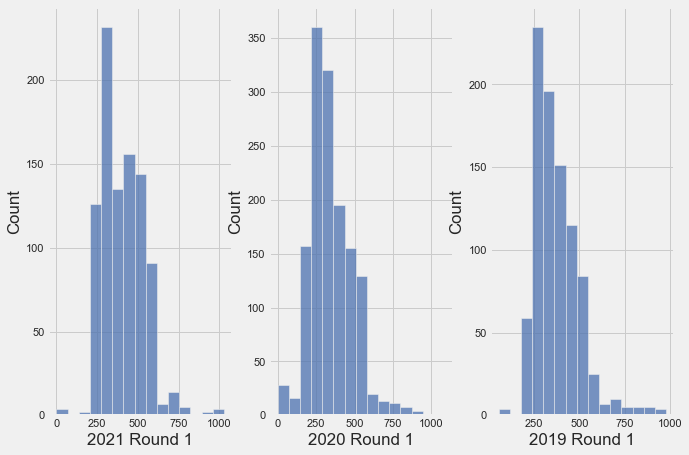

In [81]:
# 3 horizontel subplots. [28]
fig, axes = plt.subplots(1,3)

# plotting histograms from seaborn, setting bins to 15. [27]
sns.histplot(r1_2021, bins = 15, ax=axes[0])
sns.histplot(r1_2020, bins = 15, ax=axes[1])
sns.histplot(r1_2019, bins = 15, ax=axes[2])

plt.plot()

In the above plot it appears we see a sudden spike in courses at approx 250-350 points for each year.  

In 2021, after the spike there is almost an even distribution between 350 - 550, with points almost growing gradually until approx 550.   

In 2020, and 2019 the spike is evident at 250-350, with a sudden drop of frequency in courses with 350 points onwards.


<br>

#### KDE plot for more accurate visualisation of the trends

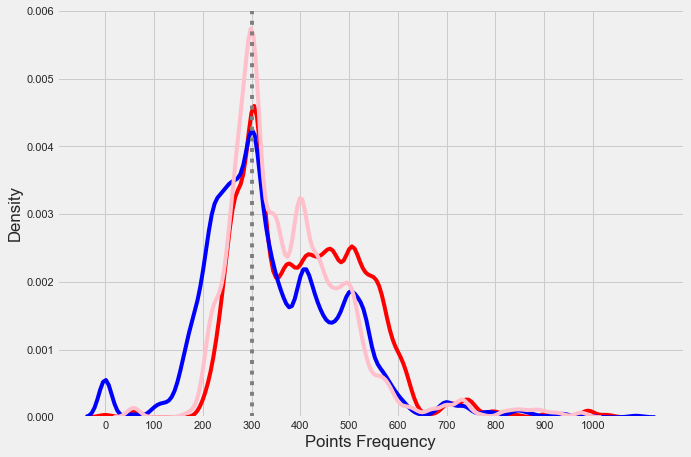

In [125]:
# KDE plot from seaborn [29]
p = sns.kdeplot(r1_2021, bw_adjust= 0.4,color='red')
sns.kdeplot(r1_2020, bw_adjust= 0.4, color='blue')
sns.kdeplot(r1_2019, bw_adjust= 0.4, color='pink')

# Veritical line at 300 to show mutual peak of spike. 
p.axvline(300, color = '0.5', linestyle = ':')

# Setting x axis tics and grid lines to understand trends better. 
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])

# Setting X label
p.set(xlabel='Points Frequency')

plt.show()

The KDE plot identifies that the peak of the said 'spike' is at 300 for the 3 years. 

The KDE plot identifies the spike begins for 2021 and 2019 at approx 190, and approx 140 in 2020. 

The KDE plot also identifies a uniform like distribution / slight increase in 2021 following the spike in points frequency.

In 2020 and 2019 we see the decline in points frequency as expected from the study on the histogram.  However there is two increases in the points frequency in both 2019 and 2020. The first is at approx 400 points in both years, and the second at approx 500.  This final spike occurs in 2021 also, before the decline in points frequency. 

Next, consider doing a CDF to get stats, scipy.stats.  and fill between to visualise. 

### Summary of additional assessments

In [54]:
# Assessment/ Boolean column headings as list to shorten code for sum.
assessments = ["2021 assessment","2020 assessment","2019 assessment"]

In [55]:
# Saving the sum of courses that have assessments for each year. 
assess21, assess20, assess19 = all_courses[assessments].sum()

In [56]:
print("In 2021, {} courses had an additional assessments.".format(assess21))
print("In 2020, {} courses had an additional assessments.".format(assess20))
print("In 2019, {} courses had an additional assessments.".format(assess19))

In 2021, 83 courses had an additional assessments.
In 2020, 127 courses had an additional assessments.
In 2019, 95 courses had an additional assessments.


# References
- [1] http://www.cao.ie/index.php?page=points&p=2021
- [2] https://www.w3schools.com/python/python_regex.asp
- [2] https://realpython.com/regex-python/
- [3] https://www.ocpsoft.org/tutorials/regular-expressions/or-in-regex/
- https://www.w3schools.com/python/python_functions.asp
- https://stackoverflow.com/questions/54496411/python-errortypeerror-findall-missing-1-required-positional-argument-stri
- https://www.w3schools.com/python/python_regex.asp
- https://realpython.com/regex-python/
- https://stackoverflow.com/questions/2013124/regex-matching-up-to-the-first-occurrence-of-a-character
- https://developers.google.com/edu/python/regular-expressions
- https://www.ocpsoft.org/tutorials/regular-expressions/or-in-regex/
- [10] https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- [11] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- [12] https://www.kite.com/python/answers/how-to-set-column-names-when-importing-a-csv-into-a-pandas-dataframe-in-python
- [13] https://pandas.pydata.org/docs/reference/api/pandas.concat.html
- [14] https://towardsdatascience.com/pandas-join-vs-merge-c365fd4fbf49
- [15] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
- [16] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- [17] https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-critera
- [18] https://datatofish.com/convert-pandas-series-to-dataframe/
- [19] https://codepad.co/snippet/replace-nan-values-with-false-in-a-column-of-a-pandas-dataframe
- [20] https://www.geeksforgeeks.org/python-pandas-series-str-contains/
- [21] https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer
- [22] https://stackoverflow.com/questions/54507486/merging-two-true-false-dataframe-columns-keeping-only-true
- [23] https://towardsdatascience.com/an-easy-way-to-replace-values-in-a-pandas-dataframe-2826bd34e59a
- [24] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- [25] https://stackoverflow.com/questions/62899860/how-can-i-resolve-typeerror-cannot-safely-cast-non-equivalent-float64-to-int6
- [26] https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/
- [27] https://seaborn.pydata.org/generated/seaborn.histplot.html
- [28] https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot


***
# End